# Introduction
In this notebook, we continue with ODI performance of international bowlers dataset. In this we will be completing the following tasks:

### 1. Data Pre-processing
* Removing unnecessary features
* Feature Engineering
* Encoding categorical features
* Filling missing values

### 2. Model implementations
* Implementing supervised machine learning models
* Calculating Accuracy score, Precision score, F1-score and Recall score of the implemented models

In [1]:
import numpy as np 
import pandas as pd 

import os

In [2]:
dataset=pd.read_csv('cricket_batsman_information.csv')

# Data Pre-processing

In [3]:
#checking for missing values
dataset.isnull().sum()

Innings Player                      0
Opposition_x                        0
Ground                              0
Country_x                           0
Innings Runs Scored Buckets         0
Innings_Runs_Score               3854
Innings_Batting_Strike_Rate     24453
Year                                0
Month                               0
Day_x                               0
Batting_Average                 18080
consistency                         0
Average_Career                     23
Strike_rate_Career               8909
form                           120534
Average_Yearly                   1321
Strike_rate_Yearly              14603
opposition                     123616
Average_Opposition               2822
Strike_rate_Opposition          14688
venue                          121290
Average_venue                   33719
Strike_rate_venue               31048
50s                                 0
100s                                0
0s                                  0
Innings_Ball

In [4]:
#rest of the missing values are replaced by medians of the respective columns
def fmedian(df,col):
    median_value=df[col].median()
    df[col].fillna(median_value, inplace=True)
    
fmedian(dataset,'consistency')
fmedian(dataset,'Average_Career')
fmedian(dataset,'Strike_rate_Career')
fmedian(dataset,'form')
fmedian(dataset,'Average_Yearly')
fmedian(dataset,'Strike_rate_Yearly')
fmedian(dataset,'opposition')
fmedian(dataset,'Average_Opposition')
fmedian(dataset,'Strike_rate_Opposition')
fmedian(dataset,'Strike_rate_venue')
fmedian(dataset,'venue')
fmedian(dataset,'Average_venue')

In [5]:
dataset.dtypes

Innings Player                  object
Opposition_x                    object
Ground                          object
Country_x                       object
Innings Runs Scored Buckets     object
Innings_Runs_Score             float64
Innings_Batting_Strike_Rate    float64
Year                             int64
Month                            int64
Day_x                           object
Batting_Average                float64
consistency                    float64
Average_Career                 float64
Strike_rate_Career             float64
form                           float64
Average_Yearly                 float64
Strike_rate_Yearly             float64
opposition                     float64
Average_Opposition             float64
Strike_rate_Opposition         float64
venue                          float64
Average_venue                  float64
Strike_rate_venue              float64
50s                              int64
100s                             int64
0s                       

## Label Encoding
Here, we are label encoding all the categorical variables using Label Encoder from sklearn library.

In [6]:
from sklearn.preprocessing import LabelEncoder

def encode(df,col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

encode(dataset,'Innings Player')
encode(dataset,'Ground')
encode(dataset,'Country_x')
encode(dataset,'Opposition_x')
encode(dataset,'Day_x')

## Checking Correlation
We will be checking correlations between the variables to better understand the data.

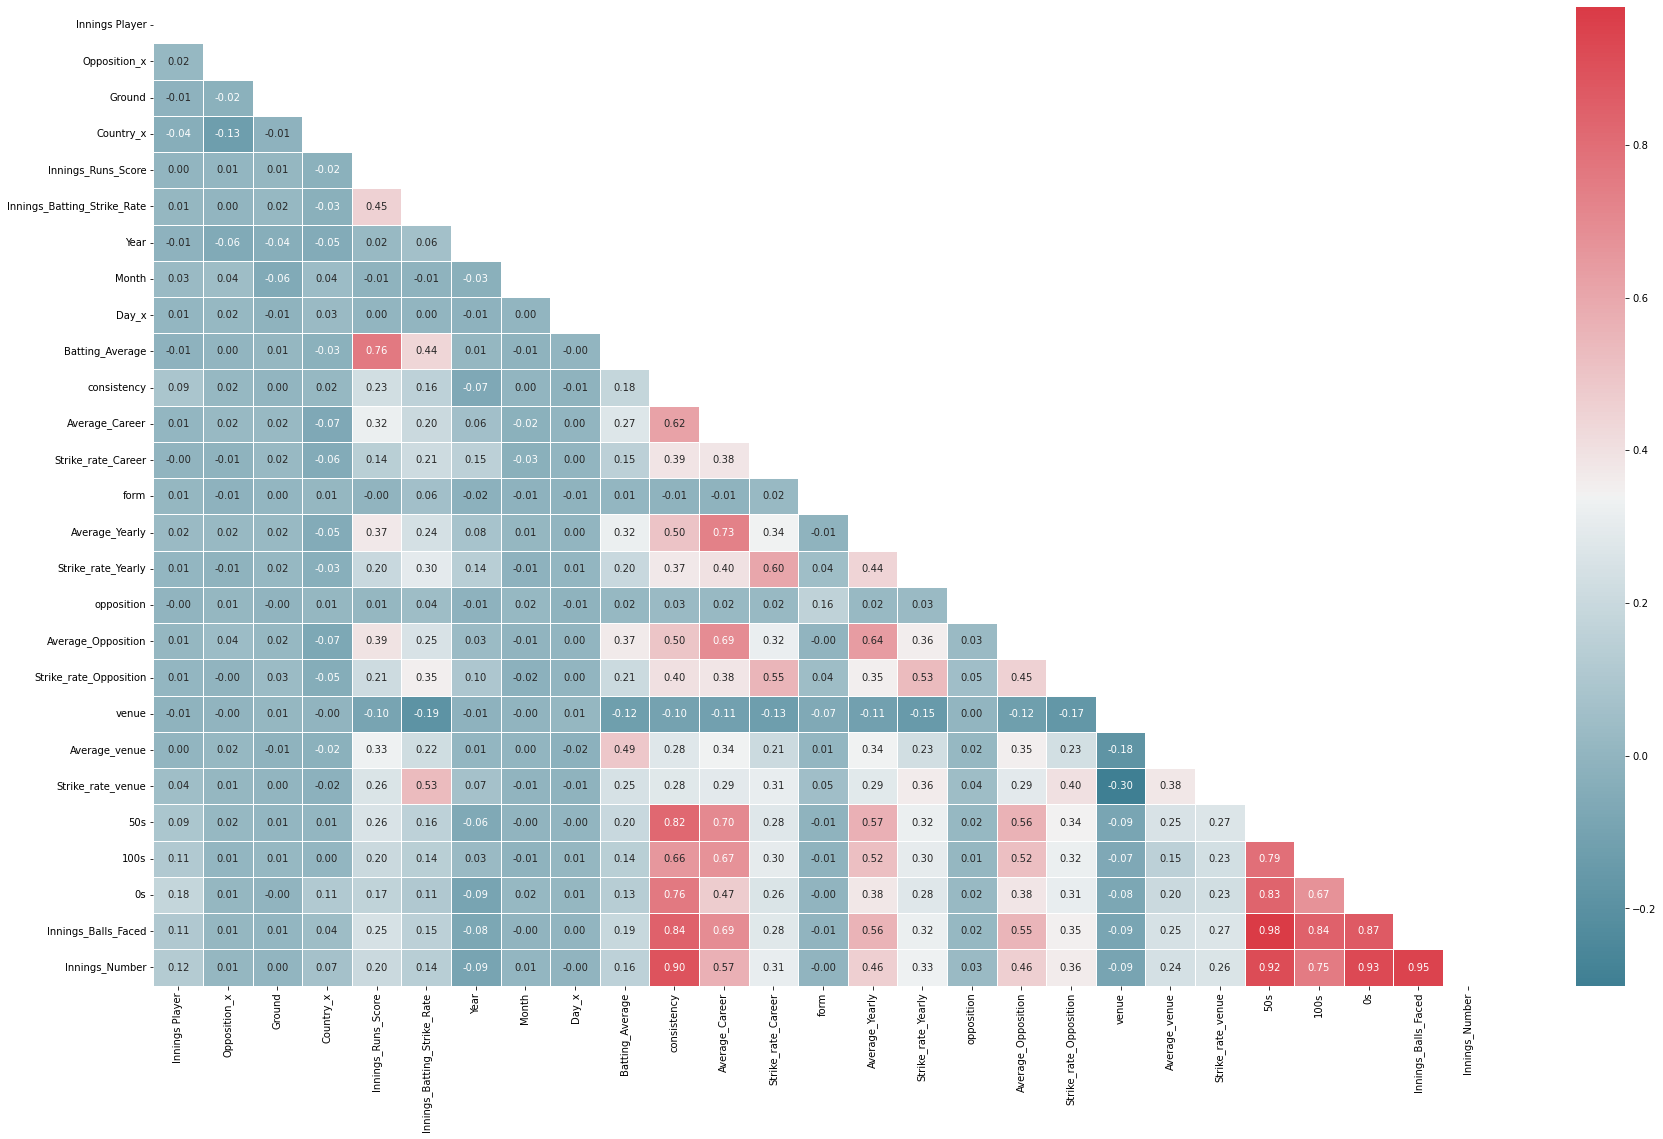

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(30, 18))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [8]:
dataset = dataset.dropna()

In [9]:
target=dataset['Innings_Runs_Score']
train=dataset.drop('Innings_Runs_Score', axis=1)

In [10]:
target.value_counts()

1.0    73322
2.0    14913
3.0     3865
4.0      380
5.0        1
Name: Innings_Runs_Score, dtype: int64

In [11]:
train.isnull().sum()

Innings Player                 0
Opposition_x                   0
Ground                         0
Country_x                      0
Innings Runs Scored Buckets    0
Innings_Batting_Strike_Rate    0
Year                           0
Month                          0
Day_x                          0
Batting_Average                0
consistency                    0
Average_Career                 0
Strike_rate_Career             0
form                           0
Average_Yearly                 0
Strike_rate_Yearly             0
opposition                     0
Average_Opposition             0
Strike_rate_Opposition         0
venue                          0
Average_venue                  0
Strike_rate_venue              0
50s                            0
100s                           0
0s                             0
Innings_Balls_Faced            0
Innings_Number                 0
dtype: int64

In [12]:
train = train.drop("Innings Runs Scored Buckets", axis = 1)

In [13]:
target.isnull().sum()

0

## Class Imbalance
We observed that majority of the records fall within class 1 in bowling. This created a major imbalance in the distribution of values and affected the performance of the learning algorithms. To solve this problem, we applied an oversampling technique Supervised Minority Oversampling Technique (SMOTE) on minority classes to make all the classes equally distributed.

In [14]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [15]:
#splitting dataset into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.20, random_state = 7)

# Model Implementation
1. Naive Bayes
2. Decision Trees
3. Random Forest

### Naive Baye's 

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.7253608693301616
Precision - 0.8296581567918586
Recall - 0.7253608693301616
F1 - 0.759772383078621


### Decision Trees

In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', splitter='best',
                             max_depth=16, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features=None, random_state=None,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.9255554954857544
Precision - 0.9248947198760946
Recall - 0.9255554954857544
F1 - 0.925125481520462


### Random Forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred) 
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print('Accuracy - {}'.format(accuracy))
print('Precision - {}'.format(precision))
print('Recall - {}'.format(recall))
print('F1 - {}'.format(f1))

Accuracy - 0.995026220468184
Precision - 0.9950139205534216
Recall - 0.995026220468184
F1 - 0.9950113764462561


# Conclusion
With an accuracy of 0.99, Random Forest has been performing the best for our dataset while Naive Bayes has been performing the worst with an accuracy of 0.68.